<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/Graph%20algorithm%20part%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

graph embedding techniques

In [1]:
pip install networkx node2vec numpy


Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

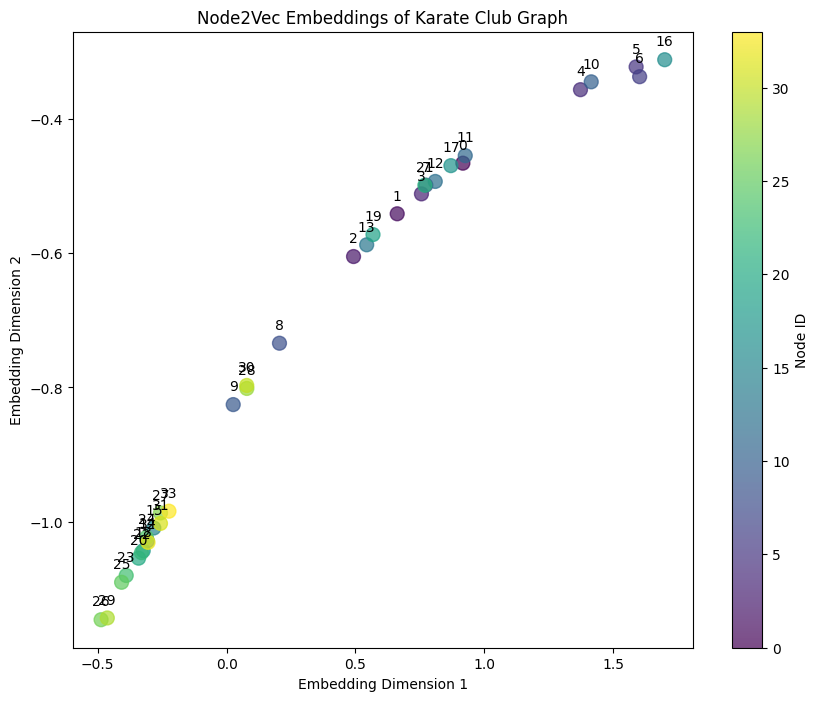

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from node2vec import Node2Vec

G = nx.karate_club_graph()

node2vec = Node2Vec(G, dimensions=2, walk_length=30, num_walks=200, workers=4)  # Create Node2Vec model
model = node2vec.fit(window=10, min_count=1)  # Fit the model

embeddings = model.wv
node_embeddings = np.array([embeddings[str(node)] for node in G.nodes()])

plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings[:, 0], node_embeddings[:, 1], s=100, c=range(len(G.nodes())), cmap='viridis', alpha=0.7)
plt.colorbar(label='Node ID')
plt.title('Node2Vec Embeddings of Karate Club Graph')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')

for i, node in enumerate(G.nodes()):
    plt.annotate(str(node), (node_embeddings[i, 0], node_embeddings[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


Louvain method for community detection

In [3]:
pip install networkx


In [ ]:
import networkx as nx
from networkx.algorithms.community import modularity
from collections import defaultdict

def louvain_method(G):
    # Initialize communities
    partition = {node: node for node in G.nodes()}
    communities = {node: {node} for node in G.nodes()}
    modularity_dict = {}

    def one_level_optimization(G, partition, communities):
        best_modularity = modularity(G, communities.values())
        improvement = True
        while improvement:
            improvement = False
            for node in G.nodes():
                node_com = partition[node]
                best_com = node_com
                best_increase = 0

                neighbors_coms = defaultdict(int)
                for neighbor in G.neighbors(node):
                    if neighbor != node:
                        neighbors_coms[partition[neighbor]] += G[node][neighbor].get('weight', 1)

                current_community = communities[node_com]
                current_community.remove(node)

                if not current_community:
                    del communities[node_com]

                current_modularity = modularity(G, communities.values())

                for com, weight in neighbors_coms.items():
                    if com not in communities:
                        continue
                    communities[com].add(node)
                    partition[node] = com
                    new_modularity = modularity(G, communities.values())
                    increase = new_modularity - current_modularity
                    if increase > best_increase:
                        best_increase = increase
                        best_com = com
                    communities[com].remove(node)

                if node_com not in communities:
                    communities[node_com] = current_community

                communities[node_com].add(node)
                partition[node] = node_com

                if best_com != node_com:
                    if node_com in communities:
                        communities[node_com].remove(node)
                        if not communities[node_com]:
                            del communities[node_com]
                    communities[best_com].add(node)
                    partition[node] = best_com
                    improvement = True

            new_modularity = modularity(G, communities.values())
            if new_modularity > best_modularity:
                best_modularity = new_modularity
                modularity_dict[best_modularity] = partition.copy()

        return partition, communities

    iteration = 0
    best_modularity = -1
    while True:
        partition, communities = one_level_optimization(G, partition, communities)
        current_modularity = modularity(G, communities.values())
        if current_modularity > best_modularity:
            best_modularity = current_modularity
        else:
            break

        new_G = nx.Graph()
        mapping = {}
        for node, com in partition.items():
            if com not in mapping:
                mapping[com] = len(mapping)
            new_G.add_node(mapping[com])

        for u, v, d in G.edges(data=True):
            new_u = mapping[partition[u]]
            new_v = mapping[partition[v]]
            if new_G.has_edge(new_u, new_v):
                new_G[new_u][new_v]['weight'] += d.get('weight', 1)
            else:
                new_G.add_edge(new_u, new_v, weight=d.get('weight', 1))

        G = new_G
        partition = {node: node for node in G.nodes()}
        communities = {node: {node} for node in G.nodes()}
        iteration += 1

    return max(modularity_dict.items(), key=lambda x: x[0])[1]

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.karate_club_graph()

    # Detect communities
    partition = louvain_method(G)

    # Print the results
    communities = defaultdict(list)
    for node, com in partition.items():
        communities[com].append(node)

    for com, nodes in communities.items():
        print(f"Community {com}: {nodes}")


Label propagation algorithm

In [12]:
import networkx as nx
import random

def label_propagation(G, max_iter=1000):
    """
    Perform Label Propagation on graph G.

    Parameters:
    G : NetworkX graph
        The graph on which to perform label propagation.
    max_iter : int
        Maximum number of iterations to run the algorithm.

    Returns:
    labels : dict
        A dictionary with nodes as keys and their corresponding labels as values.
    """

    labels = {node: i for i, node in enumerate(G.nodes())}

    for _ in range(max_iter):
        nodes = list(G.nodes())
        random.shuffle(nodes)

        for node in nodes:
            if G[node]:
                neighbor_labels = [labels[neighbor] for neighbor in G.neighbors(node)]

                most_common_label = max(set(neighbor_labels), key=neighbor_labels.count)

                labels[node] = most_common_label

    return labels

G = nx.karate_club_graph()

labels = label_propagation(G)

for node, label in labels.items():
    print(f'Node {node}: Label {label}')


Node 0: Label 0
Node 1: Label 0
Node 2: Label 0
Node 3: Label 0
Node 4: Label 0
Node 5: Label 0
Node 6: Label 0
Node 7: Label 0
Node 8: Label 0
Node 9: Label 0
Node 10: Label 0
Node 11: Label 0
Node 12: Label 0
Node 13: Label 0
Node 14: Label 32
Node 15: Label 32
Node 16: Label 0
Node 17: Label 0
Node 18: Label 32
Node 19: Label 0
Node 20: Label 32
Node 21: Label 0
Node 22: Label 32
Node 23: Label 32
Node 24: Label 32
Node 25: Label 32
Node 26: Label 32
Node 27: Label 32
Node 28: Label 32
Node 29: Label 32
Node 30: Label 0
Node 31: Label 32
Node 32: Label 32
Node 33: Label 32


Girvan-Newman Algorithm

Step 1: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Step 2: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Step 3: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


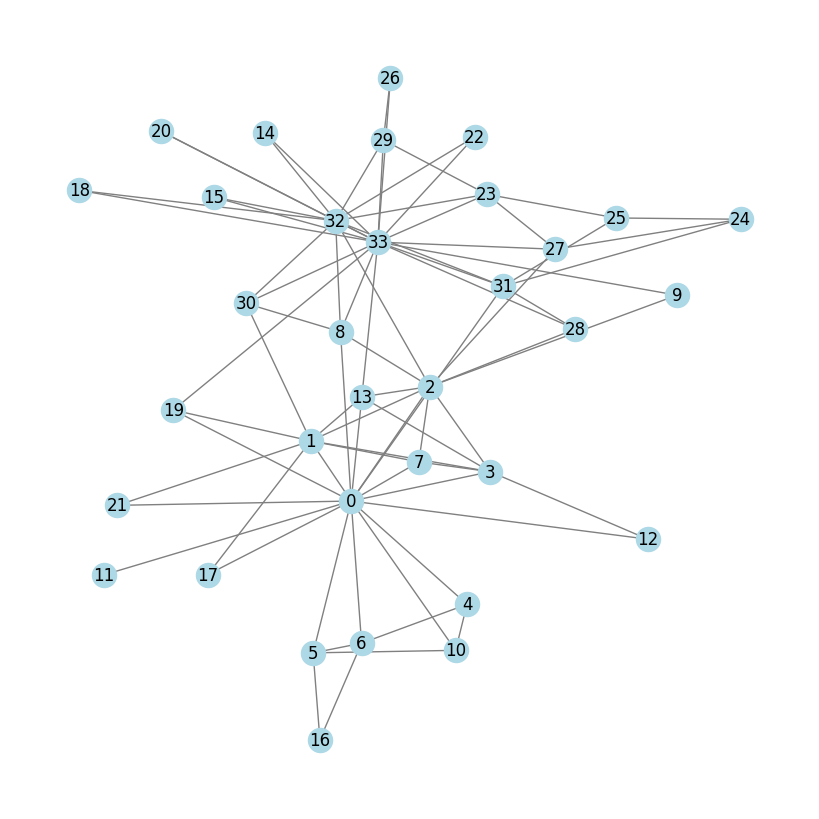

In [13]:
import networkx as nx
from networkx.algorithms.centrality import edge_betweenness_centrality
import matplotlib.pyplot as plt

def girvan_newman(G):
    if G.number_of_edges() == 0:
        yield tuple([n] for n in G.nodes())
        return

    G = G.copy()

    while G.number_of_edges() > 0:
        edge_betweenness = edge_betweenness_centrality(G)

        max_edge = max(edge_betweenness, key=edge_betweenness.get)

        G.remove_edge(*max_edge)

        components = list(nx.connected_components(G))

        if len(components) > 1:
            yield components

if __name__ == "__main__":
    G = nx.karate_club_graph()

    communities_generator = girvan_newman(G)

]    for i, communities in enumerate(communities_generator):
        print(f"Step {i + 1}: {communities}")
        if i == 2:
            break

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()


Graph neural networks

In [14]:
pip install torch torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [15]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv

dataset = Planetoid(root='/tmp/Cora', name='Cora')

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
data = dataset[0]

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
    acc = correct / int(data.test_mask.sum())
    return acc

for epoch in range(200):
    loss = train()
    print(f'Epoch {epoch+1}, Loss: {loss:.4f}')

acc = test()
print(f'Test Accuracy: {acc:.4f}')


Processing...
Done!


Epoch 1, Loss: 1.9383
Epoch 2, Loss: 1.7901
Epoch 3, Loss: 1.6540
Epoch 4, Loss: 1.4797
Epoch 5, Loss: 1.3412
Epoch 6, Loss: 1.2428
Epoch 7, Loss: 1.0920
Epoch 8, Loss: 0.9857
Epoch 9, Loss: 0.8652
Epoch 10, Loss: 0.7621
Epoch 11, Loss: 0.6911
Epoch 12, Loss: 0.5668
Epoch 13, Loss: 0.5373
Epoch 14, Loss: 0.4528
Epoch 15, Loss: 0.4341
Epoch 16, Loss: 0.3815
Epoch 17, Loss: 0.3412
Epoch 18, Loss: 0.3325
Epoch 19, Loss: 0.2891
Epoch 20, Loss: 0.2429
Epoch 21, Loss: 0.2347
Epoch 22, Loss: 0.1890
Epoch 23, Loss: 0.1826
Epoch 24, Loss: 0.1581
Epoch 25, Loss: 0.1543
Epoch 26, Loss: 0.1303
Epoch 27, Loss: 0.0939
Epoch 28, Loss: 0.1173
Epoch 29, Loss: 0.1137
Epoch 30, Loss: 0.1073
Epoch 31, Loss: 0.0969
Epoch 32, Loss: 0.0820
Epoch 33, Loss: 0.0862
Epoch 34, Loss: 0.0950
Epoch 35, Loss: 0.0752
Epoch 36, Loss: 0.0711
Epoch 37, Loss: 0.0714
Epoch 38, Loss: 0.0760
Epoch 39, Loss: 0.0837
Epoch 40, Loss: 0.0533
Epoch 41, Loss: 0.0504
Epoch 42, Loss: 0.0489
Epoch 43, Loss: 0.0408
Epoch 44, Loss: 0.04